In [1]:
from signalutils.signalutils import readFiles, encodedLabels, calcMfccs, export_to_pickle, unpickle
import numpy as np

In [3]:
spk1 = unpickle("data/AM1.pickle")
table_ys= list(map(lambda a: a['y'], spk1))
table_ys.sort()

In [4]:
#save data in dicts:    "AM1":{"AM1":0, "AM2:"3",...},"PP":{"AM1":20, ...}...
import os
results = dict()
for path, subdirs, files in os.walk("data"):
        for name in files:
            buffer = unpickle("data/"+name)
            for idx, element in enumerate(buffer):
                if idx == 0:
                    results[element['x']] = dict()
                results[element['x']][element['y']] = element['cost']

In [5]:
# clear "AM1", "AP_1", "as2", "PP-2" to XX_N
def normalizeName(name):
    import re
    name = re.sub(r'[^\w]', '', name)
    name = name.replace("_", "")
    recordName = name[:2]
    recordNumber= name[2:]
    return f"{recordName.upper()}_{recordNumber}"

In [6]:
#transform data to {"XX": [cost1, cost2,...], "XY", [cost1, cost2, ...]...}
tableData = {}
for x in table_ys:
    buff = []
    for y in table_ys:
        buff.append(results[x][y])
        tableData[normalizeName(x)] = buff

In [7]:
import pandas as pd


In [8]:
df = pd.DataFrame(data = tableData, index = list(map(lambda labelName: normalizeName(labelName), table_ys)))

In [9]:
#normalize costs
column_maxes = df.max()
df_max = column_maxes.max()
df = df / df_max

In [10]:
df

,AM_1,AM_2,AM_3,AM_4,AM_5,AM_6,AM_7,AM_8,AM_9,AP_1,...,AS_1,AS_10,AS_2,AS_3,AS_4,AS_5,AS_6,AS_7,AS_8,AS_9
AM_1,0.000000,0.158232,0.177247,0.208308,0.289590,0.326725,0.320143,0.359638,0.367097,0.541280,...,0.266794,0.322555,0.302869,0.322436,0.362012,0.320448,0.301493,0.319126,0.299712,0.338580
AM_2,0.158232,0.000000,0.127367,0.152335,0.207514,0.195632,0.217976,0.218186,0.228398,0.512025,...,0.222609,0.256244,0.265309,0.275690,0.311238,0.258009,0.257466,0.268754,0.253708,0.270953
AM_3,0.177247,0.127367,0.000000,0.139760,0.184212,0.196296,0.210200,0.213629,0.245948,0.514805,...,0.245686,0.299531,0.269408,0.294809,0.308339,0.281657,0.258766,0.291827,0.255789,0.295933
AM_4,0.208308,0.152335,0.139760,0.000000,0.161744,0.155656,0.168030,0.179680,0.205193,0.473379,...,0.252332,0.283809,0.258406,0.274559,0.310009,0.279686,0.260555,0.283012,0.249797,0.271837
AM_5,0.289590,0.207514,0.184212,0.161744,0.000000,0.148110,0.168768,0.143206,0.177896,0.476907,...,0.287679,0.304785,0.258622,0.276484,0.317388,0.288347,0.265840,0.292284,0.250162,0.281848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AS_5,0.320448,0.258009,0.281657,0.279686,0.288347,0.273859,0.252923,0.289576,0.291394,0.420602,...,0.143136,0.099744,0.095931,0.085849,0.081677,0.000000,0.091906,0.079775,0.077331,0.080266
AS_6,0.301493,0.257466,0.258766,0.260555,0.265840,0.258544,0.222931,0.273176,0.265454,0.422595,...,0.118446,0.097970,0.095615,0.084279,0.096193,0.091906,0.000000,0.074515,0.082129,0.081695
AS_7,0.319126,0.268754,0.291827,0.283012,0.292284,0.289924,0.244755,0.307262,0.291989,0.411579,...,0.131318,0.086901,0.104760,0.073476,0.103388,0.079775,0.074515,0.000000,0.069448,0.086220
AS_8,0.299712,0.253708,0.255789,0.249797,0.250162,0.247067,0.206906,0.259465,0.251764,0.393207,...,0.120381,0.083624,0.088602,0.068943,0.106784,0.077331,0.082129,0.069448,0.000000,0.070848


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
fig.savefig('matrix.png')

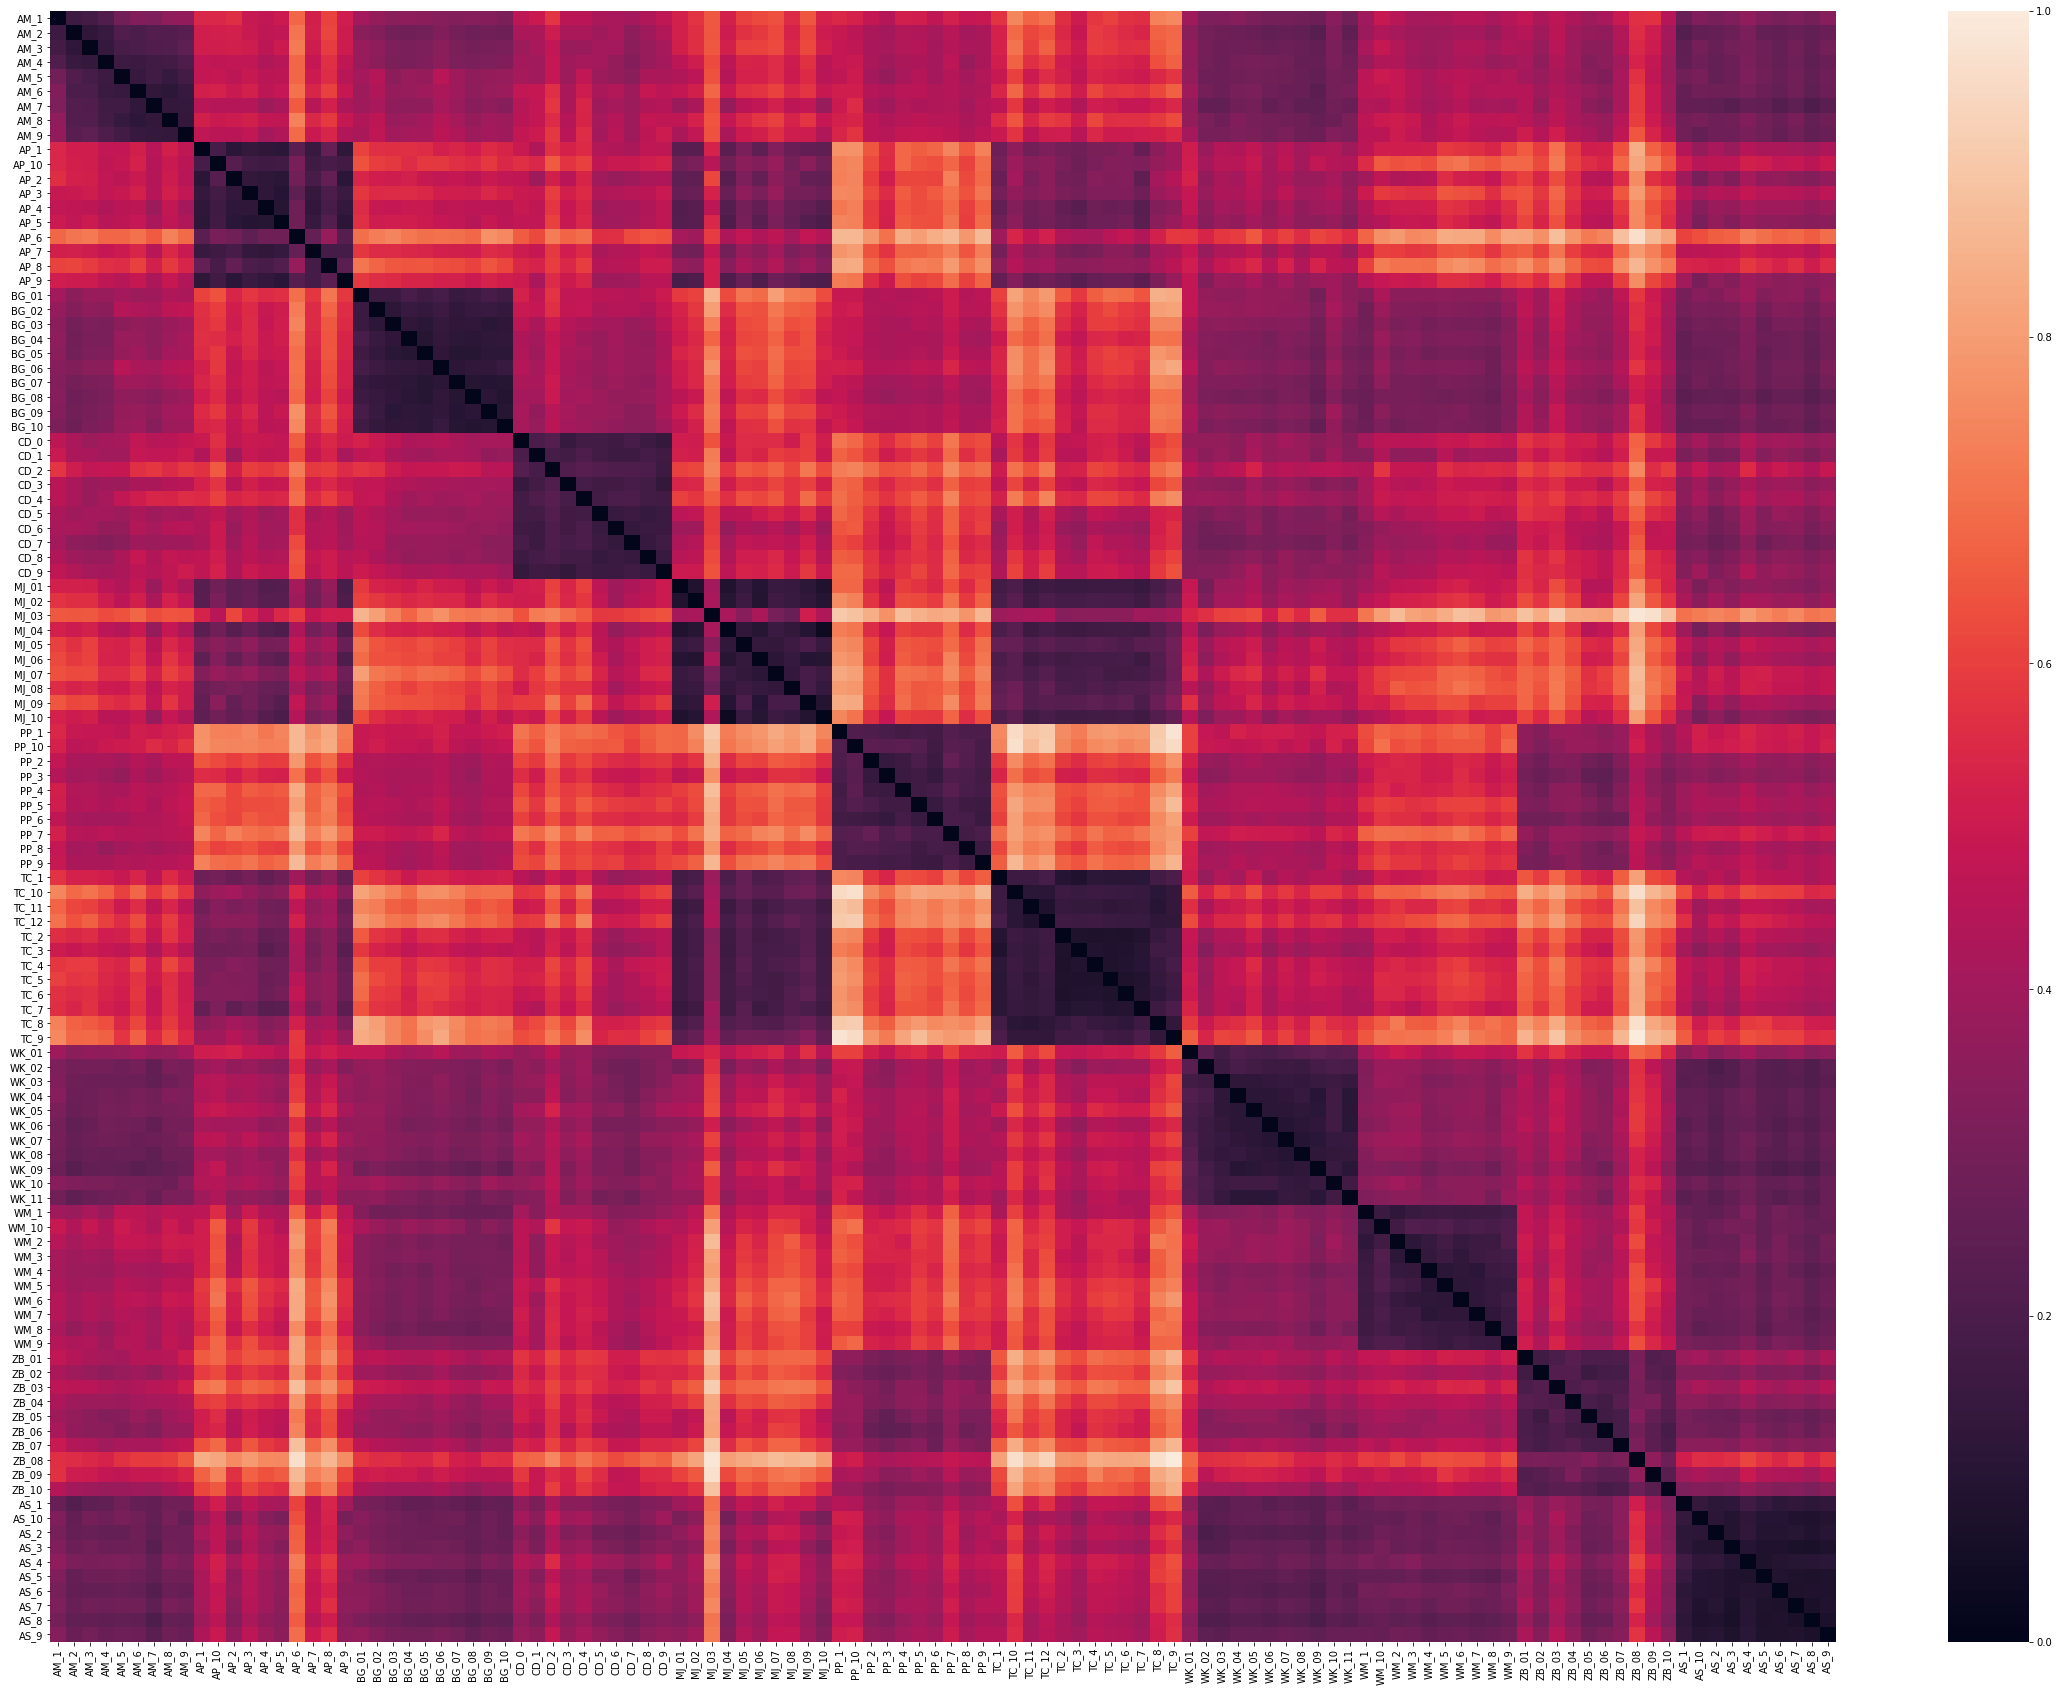

In [13]:
plt.subplots(figsize=(40,30))
plot = sns.heatmap(df, xticklabels=True, yticklabels=True)
fig = plot.get_figure()
# sns.heatmap(df,cmap="YlGnBu")

In [16]:
results

{'AP_6': {'BG_08': 9.441328286972421,
  'BG_07': 9.656070318492903,
  'BG_02': 10.071773330940017,
  'BG_10': 10.385064000595424,
  'BG_09': 10.667210062664536,
  'BG_06': 9.68556171544324,
  'BG_03': 10.294390284514938,
  'BG_05': 9.6540636708758,
  'BG_04': 9.921663721728251,
  'BG_01': 9.655772851576803,
  'WM3': 10.38745473775069,
  'WM1': 9.31080267910899,
  'WM9': 11.390676494503694,
  'WM10': 10.642280736108075,
  'WM4': 10.5548786865923,
  'WM2': 10.936355928276685,
  'WM8': 10.48856174542735,
  'WM5': 11.518328239354757,
  'WM6': 11.496505794121,
  'WM7': 11.45592991108838,
  'CD1': 8.5790846724028,
  'CD6': 7.829244977425484,
  'CD5': 7.757779006319321,
  'CD3': 9.34517806983445,
  'CD4': 9.5931933478314,
  'CD0': 9.101199922436779,
  'CD7': 8.634593868224599,
  'CD9': 8.707978647166902,
  'CD8': 8.903059027948368,
  'CD2': 10.049904943056001,
  'PP_9': 12.026519269559873,
  'PP_7': 12.013350128593101,
  'PP_4': 11.562823229183005,
  'PP_5': 11.079738629090519,
  'PP_6': 11.6